# Import Libraries

In [72]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from imblearn.combine import SMOTEENN

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc,plot_roc_curve

#problem statement

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 


In [6]:
#importing the csv file
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [7]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# EDA: Exploratory Data Analysis

In [9]:
## checking the shape of the dataset
df.shape

(1000, 40)

In [8]:
#lets check for Null Values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
# checking data type
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [11]:
#we could see some missing values with '?', which is something to be taken care of.
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [12]:
# before dropping these '?' values we are converting those into NaN values
df = df.replace('?',np.NaN)

In [13]:
# checking null values once again
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

let's see the value count of these three columns with missing values before we fill.

In [14]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [15]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [16]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [17]:
## We have repalce the collision type with the mode value
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
## We have replace the property damage info as no for nan values                                                  
df['property_damage']=df['property_damage'].replace(np.nan,'NO')
## We also repalce NO with nan values where police report had ? in our dataset.                                                 
df['police_report_available']=df['police_report_available'].replace(np.nan,'NO')
# we repalced _c39 because it all contain null values
df=df.drop(['_c39'],axis=1)

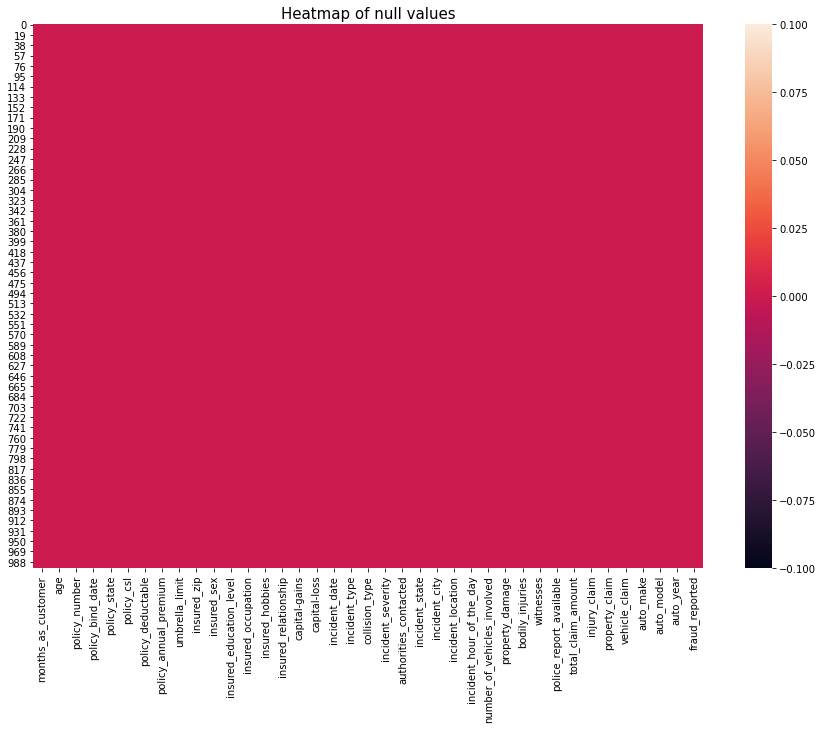

In [18]:
# ploting heatmap for null values check
plt.figure(figsize=(15,10))
plt.title('Heatmap of null values',fontsize=15)
sns.heatmap(df.isnull());

In [19]:
# Checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [20]:
# Creating a new feature for vehicle age
df['vechicle_age']=2021-df['auto_year']

In [21]:
# let's delete unnecassary columns
df=df.drop(['policy_number','insured_zip','incident_location','auto_year','policy_bind_date','policy_state','incident_date'],axis=1)

In [22]:
# Selecting object data type
do=df.select_dtypes(include='object')

In [24]:
for i in do:
    print('-'*25)
    print(i)
    print('-'*25)
    print(do[i].value_counts())

-------------------------
policy_csl
-------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
-------------------------
insured_sex
-------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
-------------------------
insured_education_level
-------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
-------------------------
insured_occupation
-------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
-------------------------
insured_h

In [25]:
#stats summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


Using the describe method to check the numerical data details. There are 17 columns which have numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all mostly properly distributed in terms of data points but I do see some abnormality that we will confirm with a visual on it.

In [28]:
# getting list of all object data type column names
obj_dtype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        obj_dtype.append(x)
print(f"Object Data Type Columns are:\n ",obj_dtype)

# getting the list of all numeric data type column names
num_dtype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        num_dtype.append(x)
print(f"\nNumber Data Type Columns are:\n ",num_dtype)

Object Data Type Columns are:
  ['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

Number Data Type Columns are:
  ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'vechicle_age']


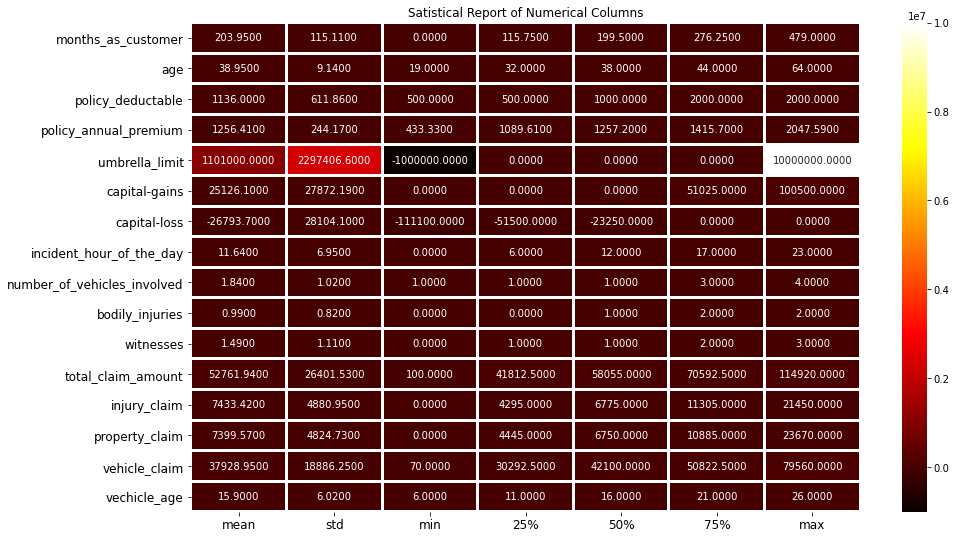

In [26]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="hot")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

# Data Visulization

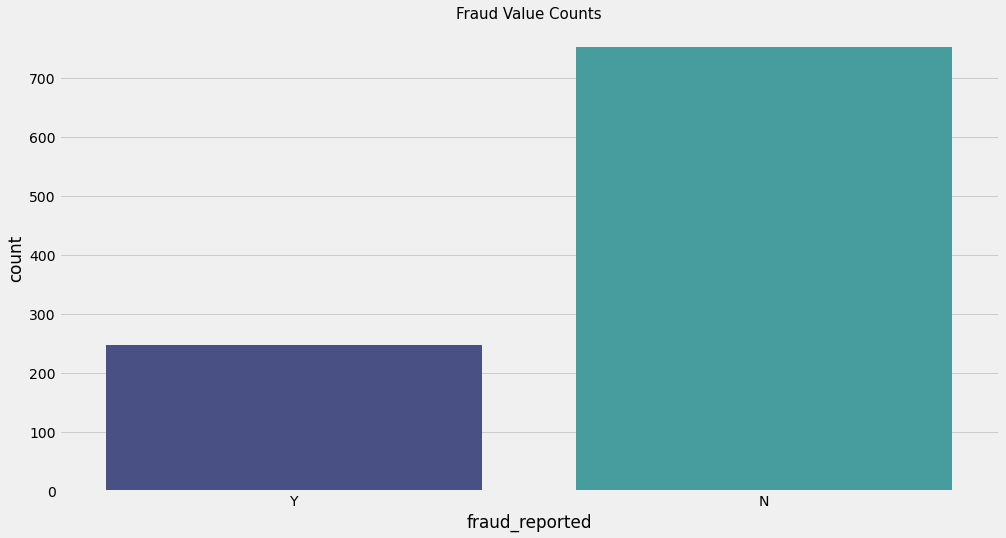

In [32]:
plt.figure(figsize=(15,8))
plt.title('Fraud Value Counts',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['fraud_reported'],palette='mako', data=df);

32 % insurance claims reported as Yes in our dataset and 68 % as No

In [39]:
def value_count(df,col):
    plt.figure(figsize=(15,8))
    plt.title(col+' no of counts',fontsize=15)
    plt.style.use('fivethirtyeight')
    sns.countplot(df[col],palette='cool', data=df)

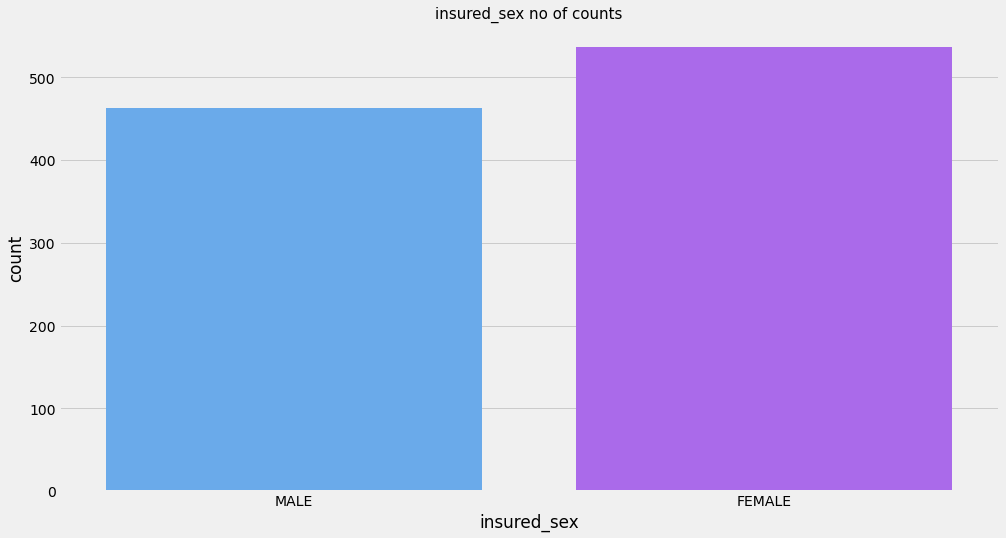

In [40]:
value_count(df,'insured_sex')

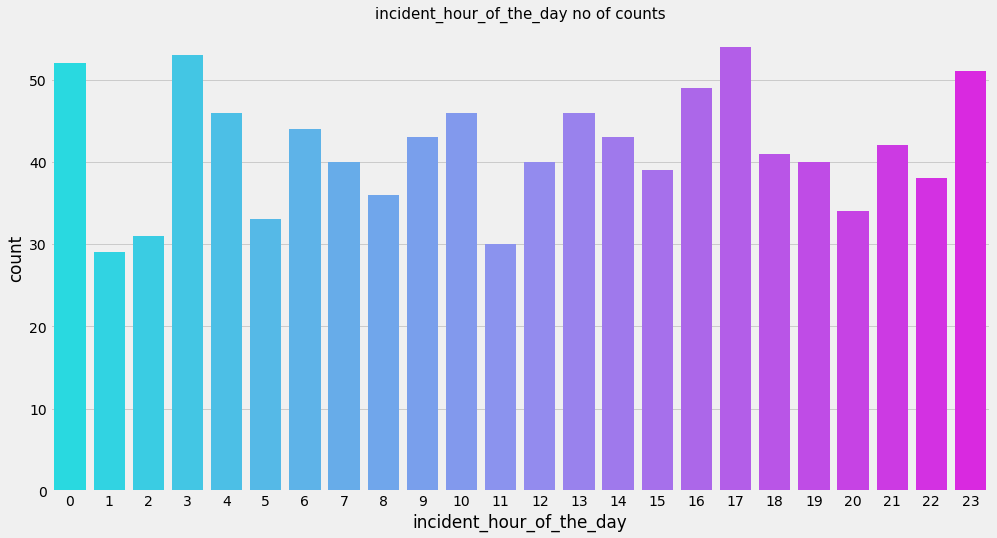

In [41]:
value_count(df,'incident_hour_of_the_day')

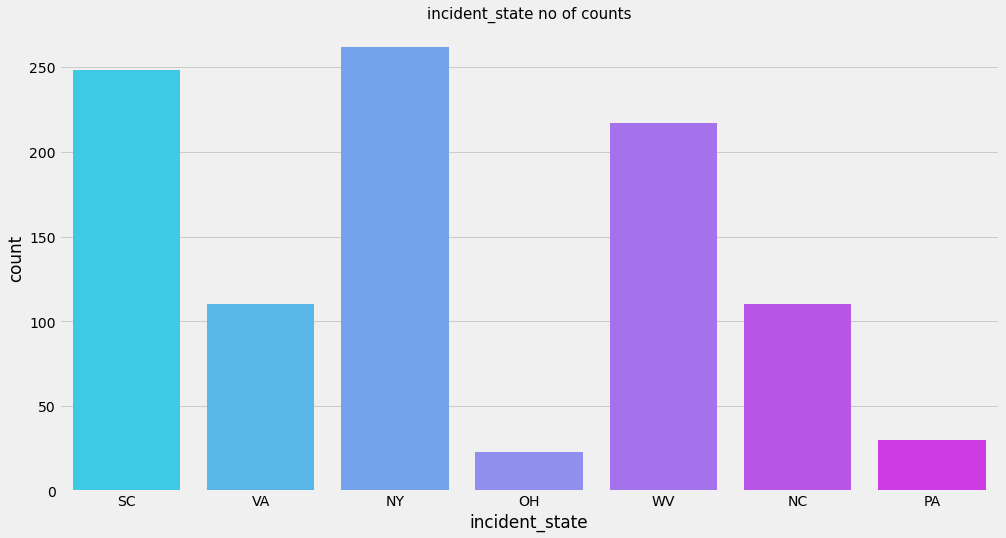

In [42]:
value_count(df,'incident_state')

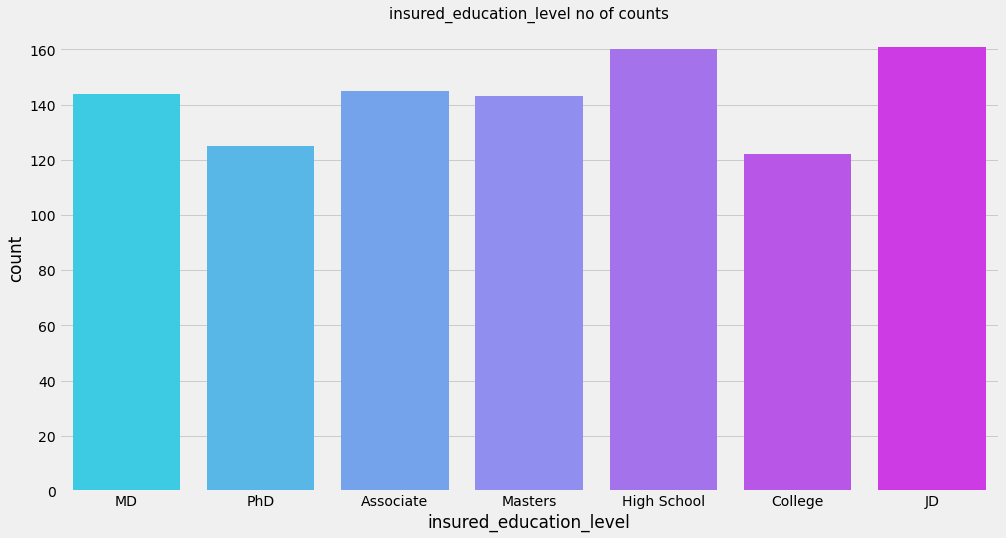

In [43]:
# Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported
value_count(df,'insured_education_level')

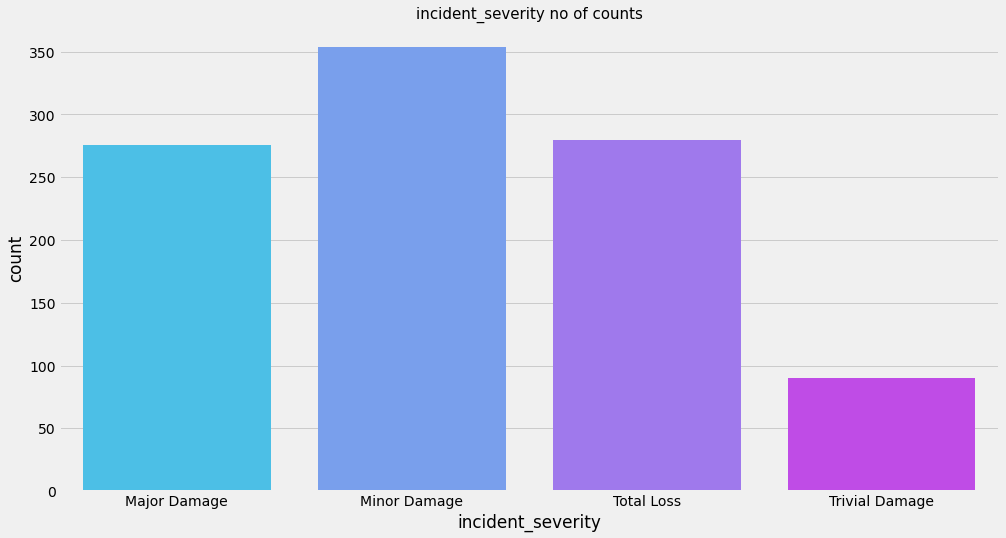

In [44]:
value_count(df,'incident_severity')

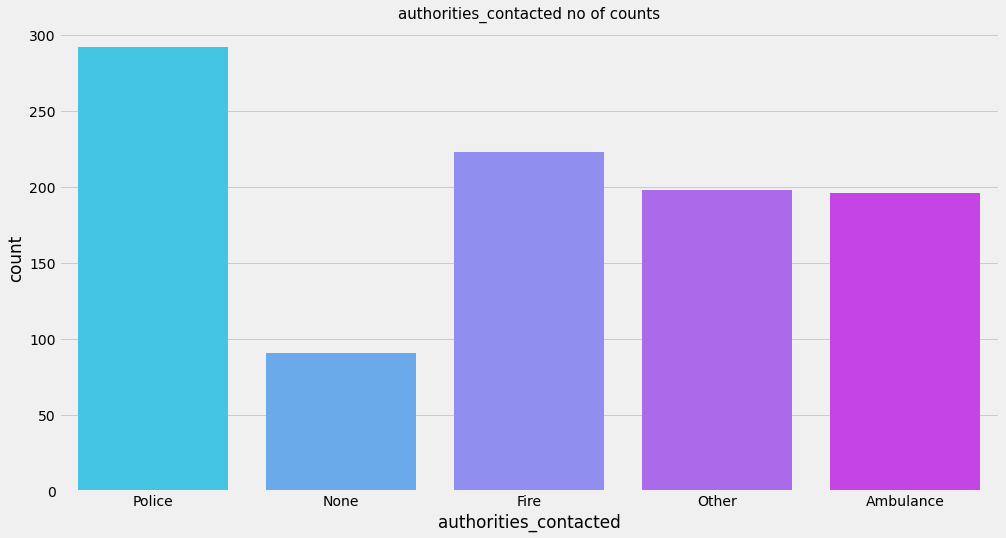

In [45]:
value_count(df,'authorities_contacted')

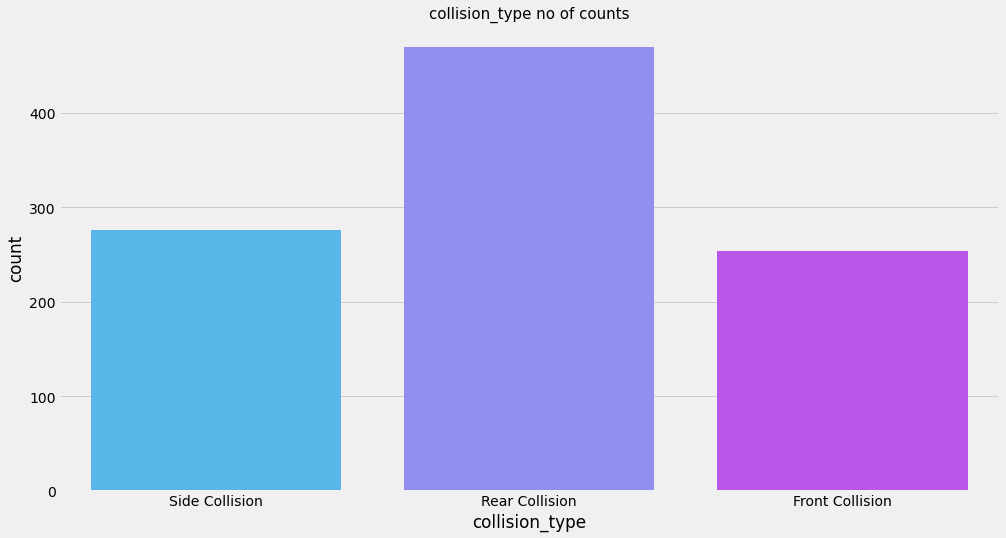

In [46]:
value_count(df,'collision_type')

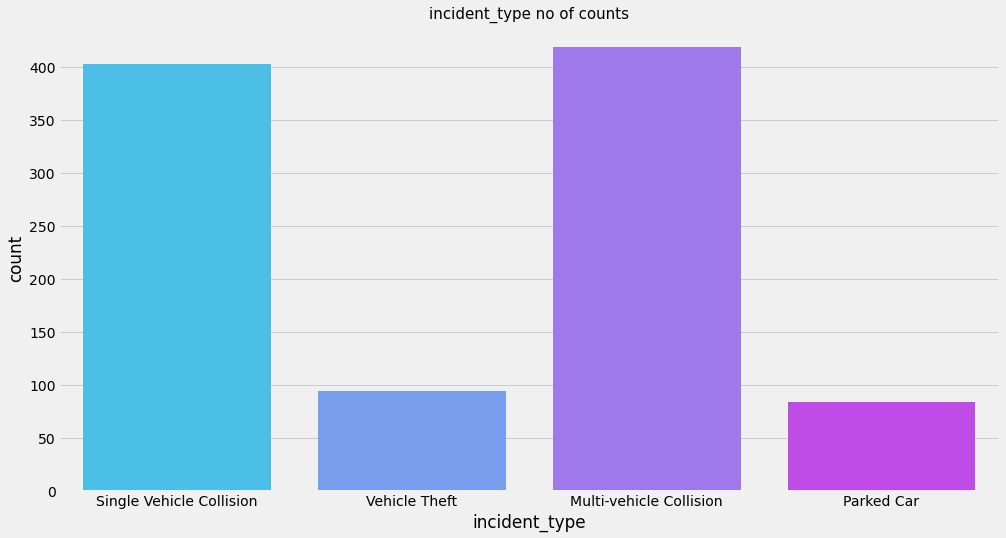

In [47]:
value_count(df,'incident_type')

now, with respect to target column

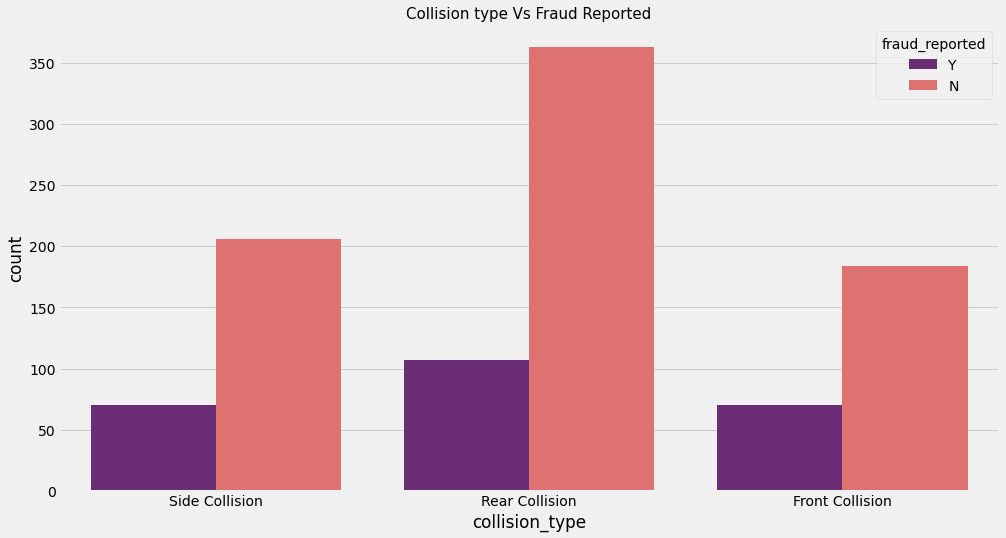

In [49]:
plt.figure(figsize=(15,8))
plt.title('Collision type Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['collision_type'],hue='fraud_reported',palette='magma',data=df);

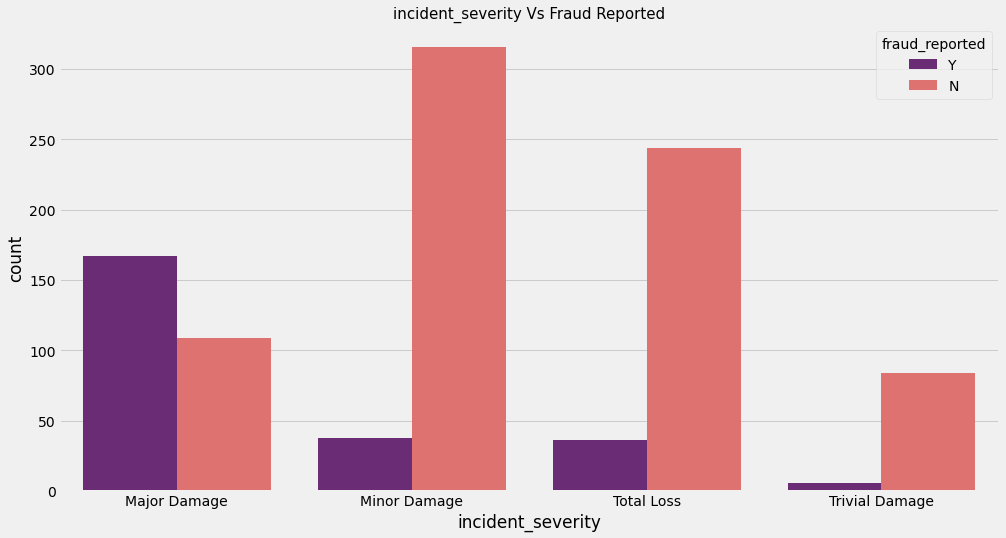

In [50]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['incident_severity'],hue='fraud_reported',palette='magma',data=df);

1-In mAjor damage case most of Fraud insurance claims reported.

2-In minor case we could see very least cases reported to froud as compared to number of cases reported of minor damage.

3- In trivial damage, lowest fraud reported.

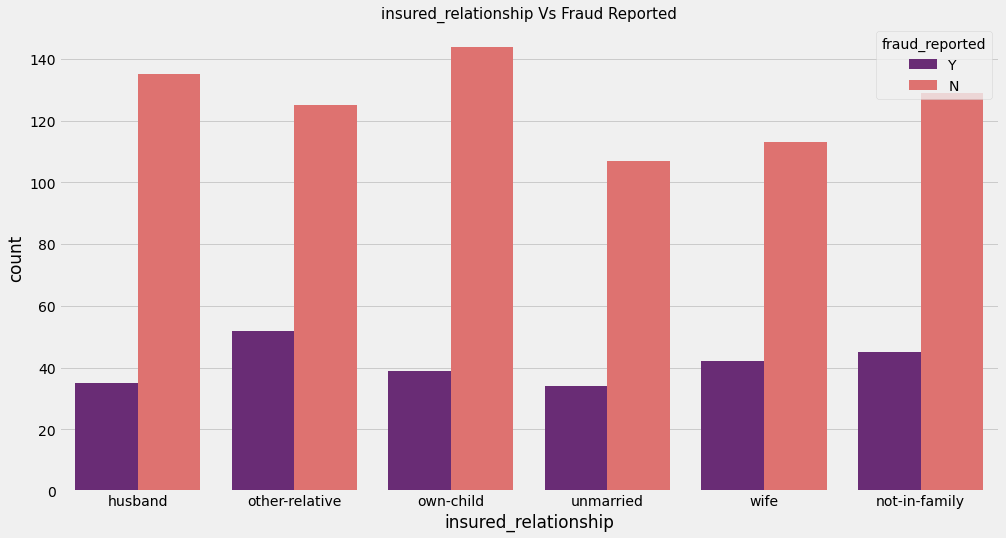

In [51]:
plt.figure(figsize=(15,8))
plt.title('insured_relationship Vs Fraud Reported',fontsize=15)
sns.countplot(df['insured_relationship'],hue='fraud_reported',palette='magma',data=df);

report for fraud is more with other relative

# Data Distribution Plot

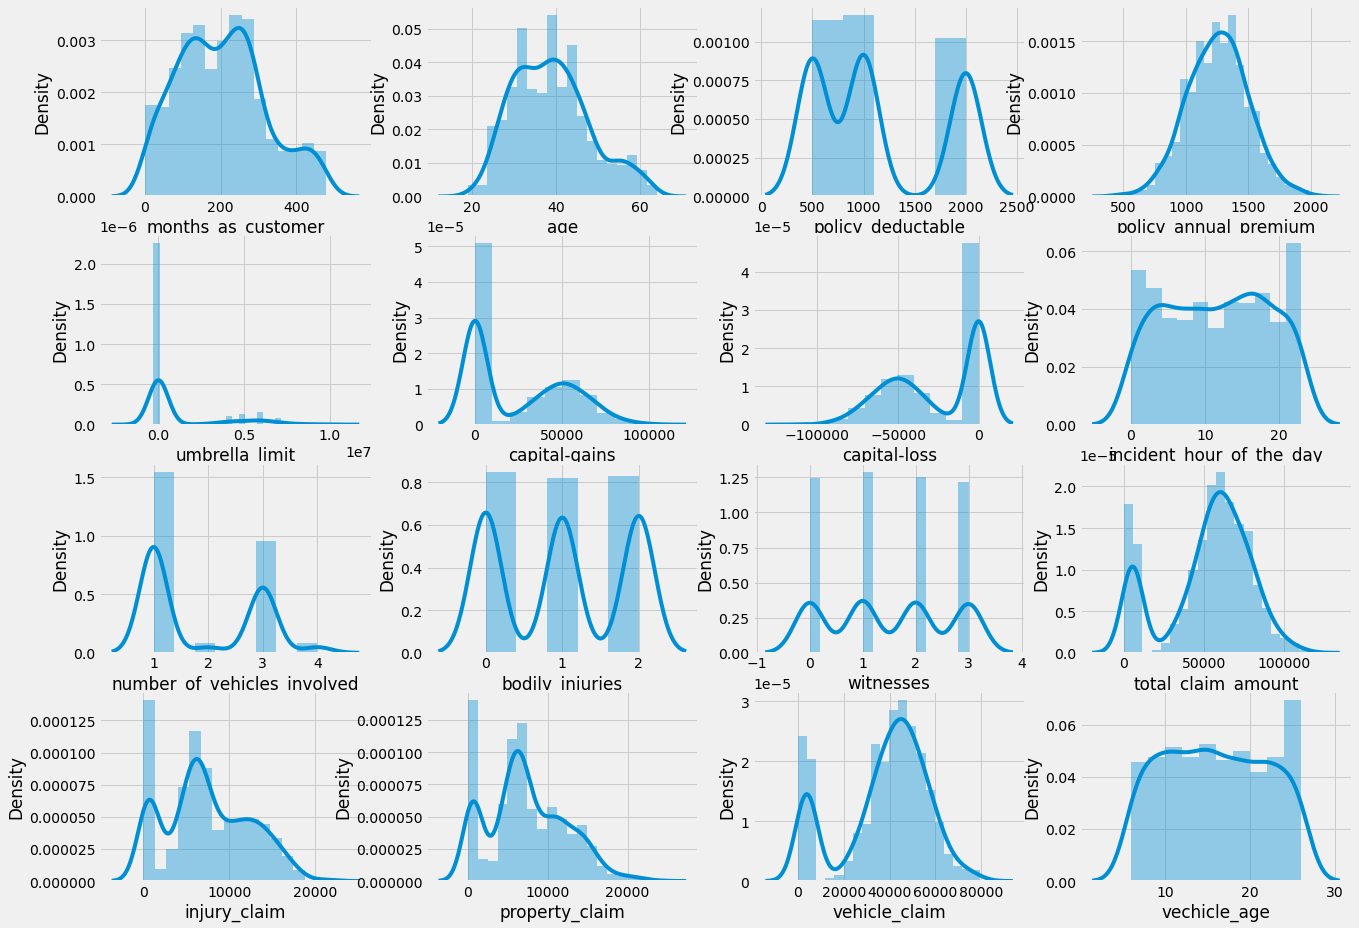

In [52]:
df_n=df.select_dtypes(exclude='object')
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
        plot=plot+1

# Skewness

In [53]:
# time to check skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
vechicle_age                   0.048289
dtype: float64

# Label Encoder

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in do:
    df[i]=le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vechicle_age
0,328,48,1,1000,1406.91,0,1,4,2,17,...,2,1,71610,6510,13020,52080,10,1,1,17
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,1,14
2,134,29,0,2000,1413.14,5000000,0,6,11,2,...,3,0,34650,7700,3850,23100,4,30,0,14
3,256,41,1,2000,1415.74,6000000,0,6,1,2,...,2,0,63400,6340,6340,50720,3,34,1,7
4,228,44,2,1000,1583.91,6000000,1,0,11,2,...,1,0,6500,1300,650,4550,0,31,0,12


# Correlation

In [55]:
df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
property_damage                0.017202
bodily_injuries                0.033877
witnesses                      0.049497
police_report_available       -0.027768


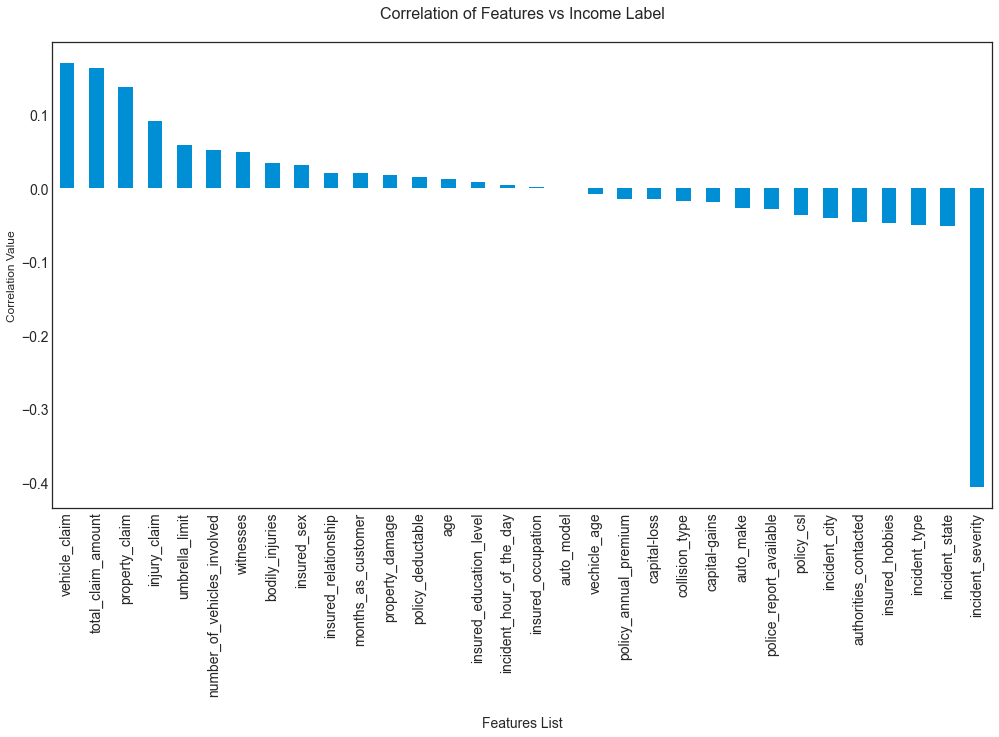

In [56]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

1- Incident Severity is highly negatively correlated with our target Attribute.

2- Neither there is a very strong nor very weak correlation exist with target attribute.

3- Auto model, insured occupation has approx zero correlation with our target attribute

# Correlation using a Heatmap

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down

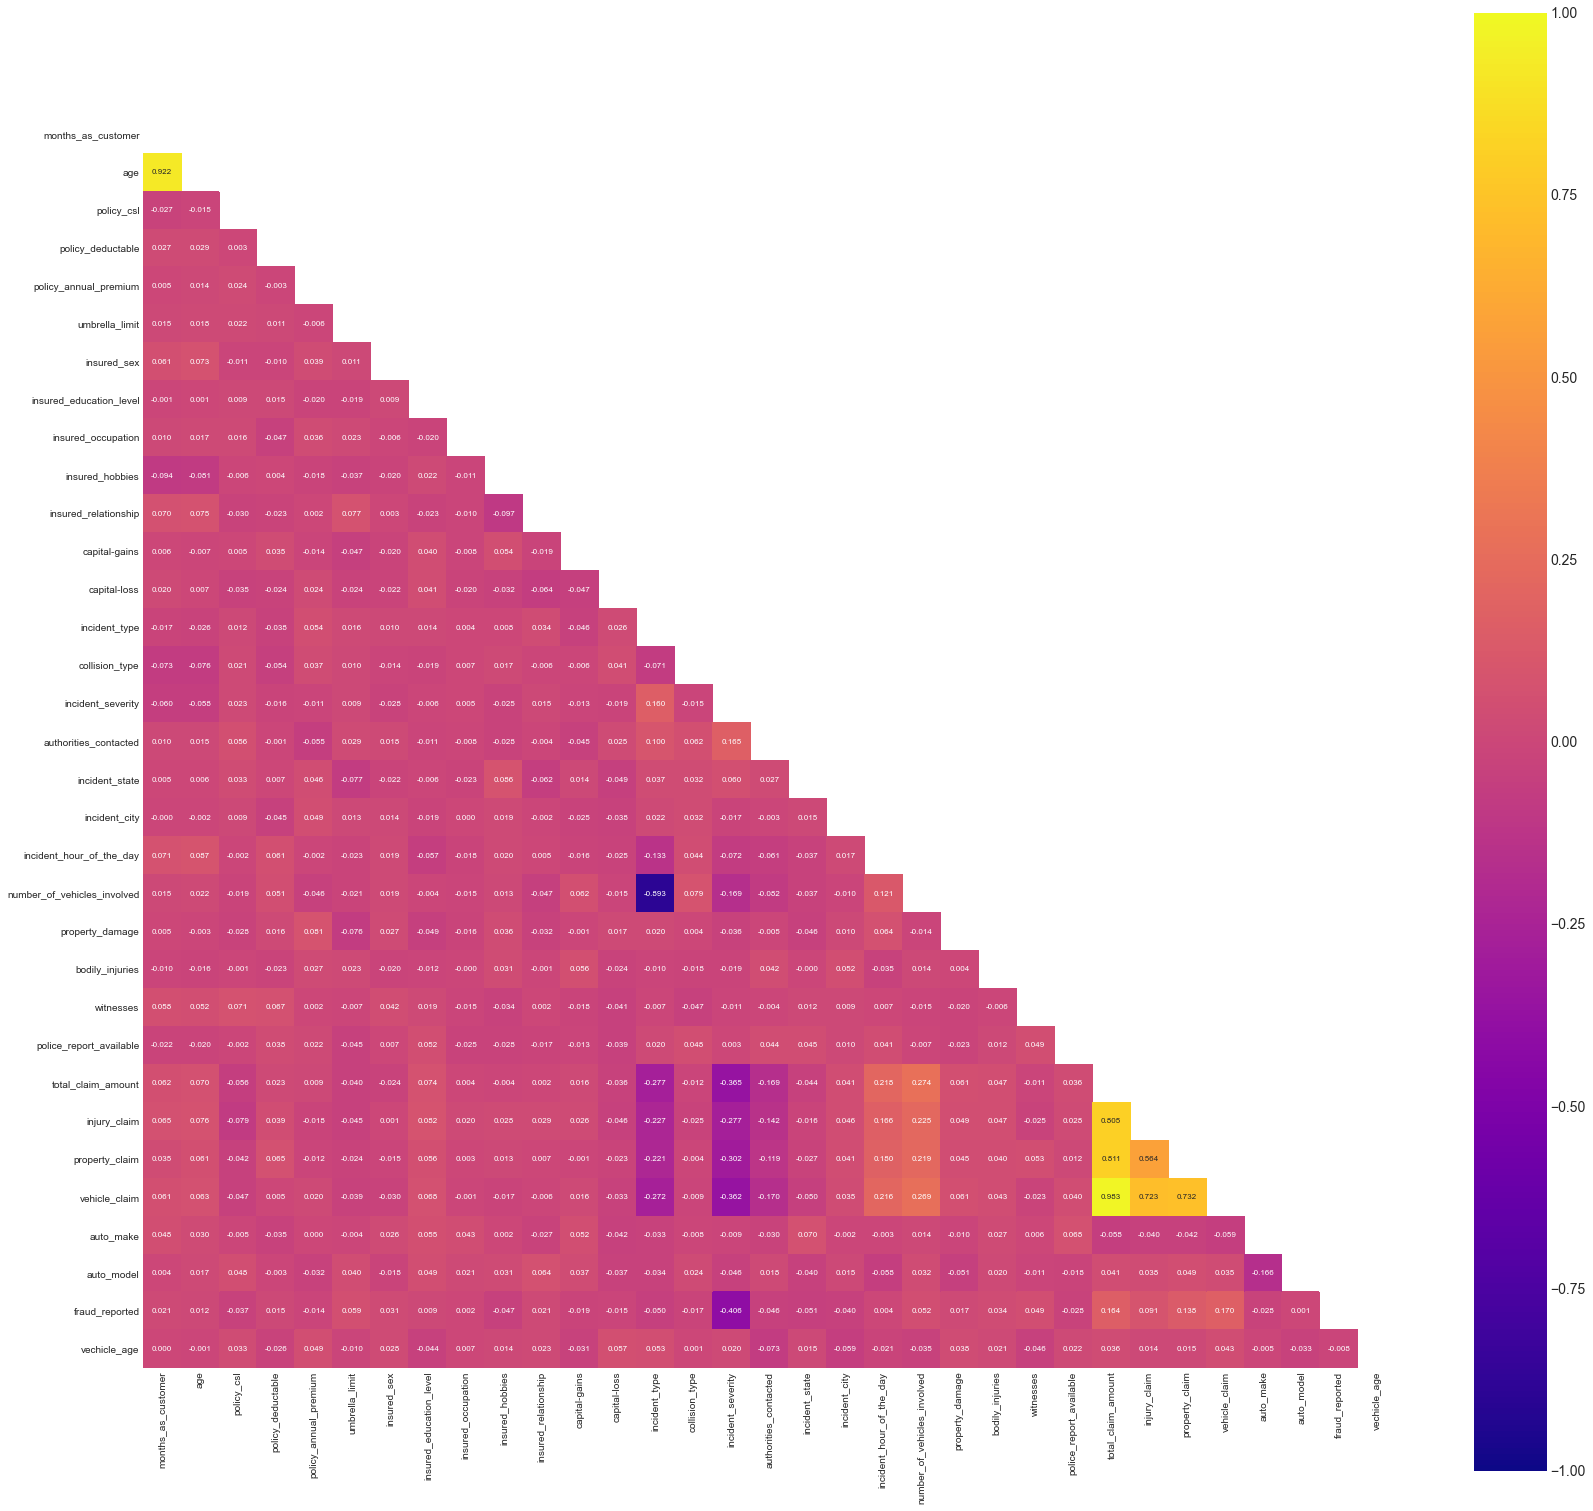

In [57]:
plt.style.use('seaborn-pastel')

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="plasma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [58]:
df.dropna(inplace=True)

let's confirm no null value should there

# Split the data in X and Y

In [59]:
x=df.drop(['fraud_reported'],axis=1)
y=df[['fraud_reported']]

# Standardization

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,1.078140,0.990836,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,1.281737,...,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,0.183440
1,0.208995,0.334073,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,0.929078,...,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,-0.315491
2,-0.608002,-1.088913,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,-1.363201,...,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,-0.315491
3,0.452355,0.224613,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,-1.363201,...,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,-1.479664
4,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,0.576420,...,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,-0.149180
996,0.704407,0.224613,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,1.281737,...,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,-1.645974
997,-0.642767,-0.541611,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,-1.186872,...,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,1.513924
998,2.208028,2.523284,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,-1.715859,...,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,1.181303


# Best randomstate

In [61]:
#over sampling of our Data
sm=SMOTEENN()
x_resample,y_resample=sm.fit_resample(x,y)
x_resample

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,...,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
1,-0.382024,-0.213229,1.304542,-1.039966,0.482754,-0.479476,-0.928546,0.530931,-1.158316,1.634395,...,0.009759,-1.338700,-0.676554,0.764280,-0.164686,1.215274,0.800509,-1.623169,1.229231,-1.645974
2,2.225411,2.523284,0.060937,-0.222383,-0.280465,1.262489,1.076953,0.017458,0.086382,-1.186872,...,0.009759,-1.338700,-0.676554,-0.212289,-1.523707,-0.447829,0.211426,1.104430,-0.028570,-0.980733
3,0.461047,0.443534,-1.182668,1.412784,0.269187,-0.479476,1.076953,-0.496015,0.584261,-0.128897,...,0.009759,1.362107,1.478078,-1.657624,-1.187539,-1.364401,-1.661772,1.352393,-0.926999,0.017130
4,-0.077823,0.005692,0.060937,-0.222383,0.562043,-0.479476,1.076953,1.557877,-0.162558,0.400091,...,-1.210174,-0.438431,1.478078,-1.899398,-1.425316,-1.434907,-1.920290,-0.383352,-0.477785,-0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.615531,0.460012,0.248145,-1.039966,1.005141,-0.479476,1.076953,0.221745,-0.548013,1.192626,...,0.009759,0.190791,-0.676554,-0.092442,-0.492192,0.333486,-0.087218,-1.225896,-1.164649,-0.440670
846,0.616889,0.572043,1.304542,1.412784,-0.866130,-0.378430,-0.812214,-1.493176,-0.148117,0.555964,...,0.080524,-1.286478,-0.676554,-0.579861,-0.062647,-0.757631,-0.600864,-1.375206,-1.376214,-0.276902
847,0.572778,0.739034,0.732384,-0.222383,0.477168,0.321967,1.076953,0.335688,0.260540,-0.929417,...,-1.210174,-0.366553,-0.676554,-0.130456,-0.360690,-1.127058,0.198770,1.124227,-1.160663,1.051674
848,1.104011,1.118861,-0.324510,0.284425,0.925793,-0.479476,1.076953,-0.850340,0.044162,0.765123,...,0.009759,1.083075,-0.676554,-0.567496,-0.664202,-0.141189,-0.585592,-1.238897,0.135878,0.792270


In [62]:
y_resample

,fraud_reported
0,0
1,0
2,0
3,0
4,0
...,...
845,1
846,1
847,1
848,1


In [63]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred)*100)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

# Random Forest

max accuracy score corresponding to 52 is 96.47058823529412


cross validation score 76.60000000000001


Standard Deviation 1.8330302779823375


F1 score 95.0354609929078


Training accuracy 100.0


Test Accuracy 91.76470588235294


Confusion Matrix [[ 22  13]
 [  1 134]]


Classification Report               precision    recall  f1-score   support

           0       0.96      0.63      0.76        35
           1       0.91      0.99      0.95       135

    accuracy                           0.92       170
   macro avg       0.93      0.81      0.85       170
weighted avg       0.92      0.92      0.91       170



Roc_auc Score 81.05820105820105





52

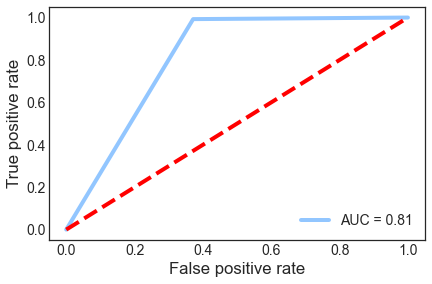

In [64]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)                      #19.87

# LogisticRegression

max accuracy score corresponding to 54 is 91.17647058823529


cross validation score 77.39999999999999


Standard Deviation 2.8705400188814676


F1 score 92.19858156028367


Training accuracy 89.26470588235294


Test Accuracy 87.05882352941177


Confusion Matrix [[ 18  17]
 [  5 130]]


Classification Report               precision    recall  f1-score   support

           0       0.78      0.51      0.62        35
           1       0.88      0.96      0.92       135

    accuracy                           0.87       170
   macro avg       0.83      0.74      0.77       170
weighted avg       0.86      0.87      0.86       170



Roc_auc Score 73.86243386243385





54

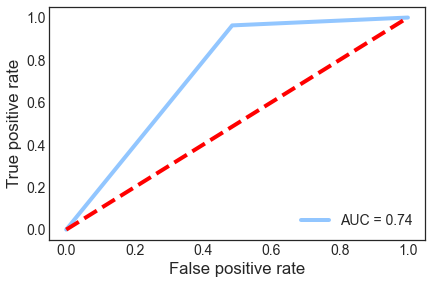

In [65]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)               #13.78

# Decision Tree

max accuracy score corresponding to 71 is 96.47058823529412


cross validation score 77.10000000000001


Standard Deviation 2.3537204591879664


F1 score 96.32352941176471


Training accuracy 100.0


Test Accuracy 94.11764705882352


Confusion Matrix [[ 29   6]
 [  4 131]]


Classification Report               precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.96      0.97      0.96       135

    accuracy                           0.94       170
   macro avg       0.92      0.90      0.91       170
weighted avg       0.94      0.94      0.94       170



Roc_auc Score 89.94708994708994





71

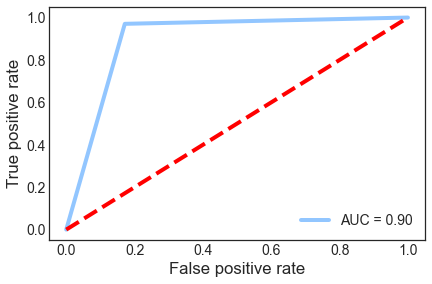

In [66]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

# Gardient Boost

max accuracy score corresponding to 51 is 97.6470588235294


cross validation score 81.60000000000001


Standard Deviation 2.596150997149431


F1 score 96.37681159420289


Training accuracy 100.0


Test Accuracy 94.11764705882352


Confusion Matrix [[ 27   8]
 [  2 133]]


Classification Report               precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       0.94      0.99      0.96       135

    accuracy                           0.94       170
   macro avg       0.94      0.88      0.90       170
weighted avg       0.94      0.94      0.94       170



Roc_auc Score 87.83068783068784





51

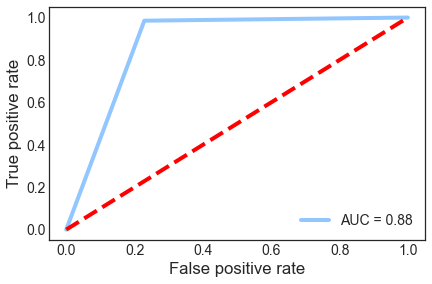

In [67]:
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)                    #16.04

# KNN

max accuracy score corresponding to 61 is 92.94117647058823


cross validation score 71.69999999999999


Standard Deviation 2.5416530054277646


F1 score 92.46575342465754


Training accuracy 91.32352941176471


Test Accuracy 87.05882352941177


Confusion Matrix [[ 13  22]
 [  0 135]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.37      0.54        35
           1       0.86      1.00      0.92       135

    accuracy                           0.87       170
   macro avg       0.93      0.69      0.73       170
weighted avg       0.89      0.87      0.85       170



Roc_auc Score 68.57142857142857





61

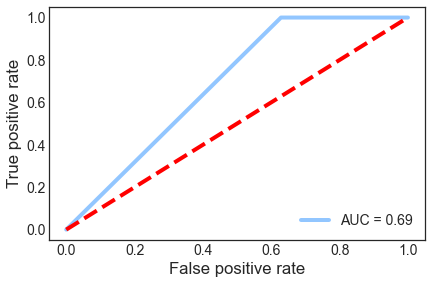

In [68]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

# Naive Bayes

max accuracy score corresponding to 52 is 90.0


cross validation score 72.09999999999998


Standard Deviation 4.8


F1 score 90.78014184397163


Training accuracy 85.44117647058823


Test Accuracy 84.70588235294117


Confusion Matrix [[ 16  19]
 [  7 128]]


Classification Report               precision    recall  f1-score   support

           0       0.70      0.46      0.55        35
           1       0.87      0.95      0.91       135

    accuracy                           0.85       170
   macro avg       0.78      0.70      0.73       170
weighted avg       0.83      0.85      0.83       170



Roc_auc Score 70.26455026455028





52

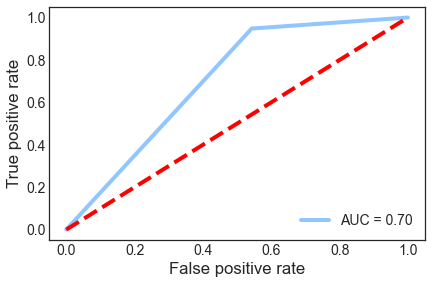

In [69]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

# Ada Boost

max accuracy score corresponding to 50 is 98.23529411764706


cross validation score 79.7


Standard Deviation 3.4146742157927736


F1 score 96.35036496350364


Training accuracy 98.82352941176471


Test Accuracy 94.11764705882352


Confusion Matrix [[ 28   7]
 [  3 132]]


Classification Report               precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           1       0.95      0.98      0.96       135

    accuracy                           0.94       170
   macro avg       0.93      0.89      0.91       170
weighted avg       0.94      0.94      0.94       170



Roc_auc Score 88.8888888888889





50

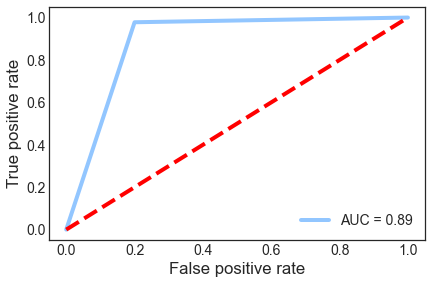

In [70]:
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 52 is 95.29411764705881


cross validation score 75.6


Standard Deviation 2.1679483388678817


F1 score 94.40559440559441


Training accuracy 100.0


Test Accuracy 90.58823529411765


Confusion Matrix [[ 19  16]
 [  0 135]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.54      0.70        35
           1       0.89      1.00      0.94       135

    accuracy                           0.91       170
   macro avg       0.95      0.77      0.82       170
weighted avg       0.92      0.91      0.89       170



Roc_auc Score 77.14285714285715





52

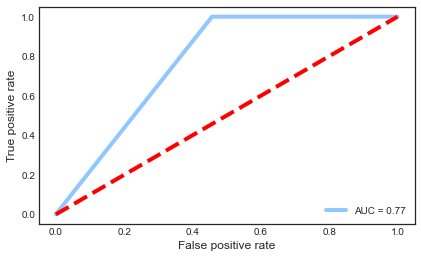

In [75]:
# Extra Trees Classifier
etc=ExtraTreesClassifier()
max_accuracy_score(etc, x, y)

# Let's check ROC_AUC curve for fitted models

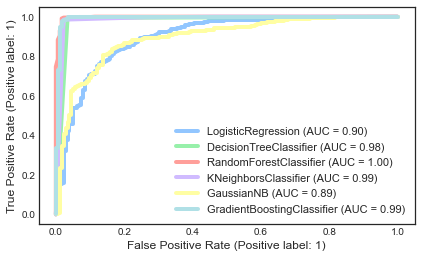

In [73]:
disp = plot_roc_curve(lr,x_resample,y_resample)
plot_roc_curve(dt,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(rf,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(knn,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gnb,x_resample,y_resample,ax=disp.ax_)
plot_roc_curve(gb,x_resample,y_resample,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

The AUC curve of Random Forest Classifier has covered 100% area under the curve.

In [82]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)

grid_param={
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}

grid = GridSearchCV(rf,param_grid = grid_param)
grid.fit(x_train,y_train)
grid.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

After comparing all the classification models I have selected Random Forest Classifier as my best model considering the accuracy score (being high) with the cross validation score against it and have listed down the chosen parameters above.

In [85]:
Final_Model = ExtraTreesClassifier(bootstrap=False, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5,n_estimators=200)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 90.64327485380117


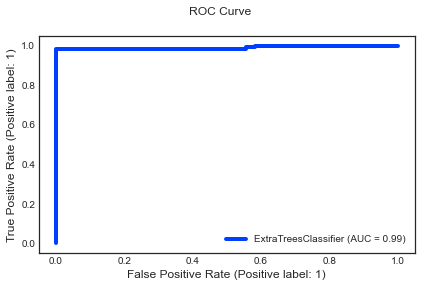

In [91]:
plt.style.use('seaborn-bright')

disp = metrics.plot_roc_curve(Final_Model, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

# Saving the model

In [92]:
filename = "Insurance claim fraud detection_final.pkl"
joblib.dump(Final_Model, filename)

['Insurance claim fraud detection_final.pkl']

Finally I am saving my best randomstate model using the joblib library.